# Configuration

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#scikitlearn importing
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 6)

#  Importing dataset

In [2]:
dev_df = pd.read_csv('dataset/development.csv', index_col = 0, na_values = '-')
dev_df.head()

,YEAR,LOC,SN,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX,CO
ID,,,,,,,,,,,,,,
0,2022,Austria,0903XTR,24.918,1006.8,55.697,3.3648,22.322,1071.5,550.03,119.83,11.171,NaN,1.07640
1,2022,Romania,0903XTR,14.332,1024.1,81.857,3.2767,20.049,1037.3,533.70,110.05,10.692,102.010,10.19600
2,2022,Sweden,0903XTR,11.548,1009.1,78.389,4.9142,28.616,1093.9,539.43,147.19,12.979,NaN,0.78407
3,2022,Finland,0903XTR,25.597,1003.0,77.744,3.2325,20.749,1062.1,549.95,112.79,10.624,52.225,1.61530
4,2022,Estonia,0903XTR,13.484,1011.1,96.477,4.1968,24.230,1086.1,550.08,133.71,11.921,71.915,1.40710


In [3]:
eval_df = pd.read_csv('dataset/evaluation.csv', index_col = 0, na_values = '-')


eval_df.head()

,YEAR,LOC,SN,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
ID,,,,,,,,,,,,,
24488,2022,Republic of Cyprus,0903XTR,24.276,1013.3,67.643,3.9119,26.056,1093.8,549.73,134.44,12.163,NaN
24489,2022,Estonia,0903XTR,10.100,1015.9,100.150,3.5681,19.167,1049.8,545.97,110.74,10.415,NaN
24490,2020,Estonia,0903XTR,26.283,1015.1,58.595,4.9541,25.910,1092.9,549.89,133.21,12.271,NaN
24491,2018,Denmark,0903XTR,7.811,1015.9,73.624,2.5919,21.351,1036.2,543.81,107.77,10.355,NaN
24492,2021,Latvia,0903XTR,25.138,1010.3,82.853,3.6168,20.117,1057.8,550.01,109.80,10.500,51.366


# Dataset Exploration

## Development Dataset

In [26]:
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24488 entries, 0 to 24487
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    24488 non-null  int64  
 1   LOC     24488 non-null  object 
 2   SN      24488 non-null  object 
 3   AT      24488 non-null  float64
 4   AP      24488 non-null  float64
 5   AH      24488 non-null  float64
 6   AFDP    24488 non-null  float64
 7   GTEP    24488 non-null  float64
 8   TIT     24488 non-null  float64
 9   TAT     24488 non-null  float64
 10  TEY     24488 non-null  float64
 11  CDP     24488 non-null  float64
 12  NOX     12220 non-null  float64
 13  CO      24488 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 2.8+ MB


In [27]:
dev_df.describe()

,YEAR,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX,CO
count,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,12220.000000,24488.000000
mean,2020.021562,17.732311,1013.040249,77.851576,3.926046,25.547051,1081.393270,546.180856,133.444970,12.056017,65.241146,2.379069
std,1.417453,7.472854,6.472126,14.528496,0.775096,4.188980,17.511092,6.829290,15.606517,1.087296,11.480075,2.270383
min,2018.000000,-6.234800,986.160000,24.085000,2.087400,17.698000,1001.300000,511.040000,100.020000,9.875400,29.063000,0.000388
25%,2019.000000,11.754750,1008.800000,68.164000,3.354175,23.080000,1071.600000,544.810000,124.220000,11.423000,57.205000,1.186750
50%,2020.000000,17.838000,1012.600000,80.494000,3.937450,25.092500,1085.900000,549.880000,133.730000,11.963000,63.822500,1.719450
75%,2021.000000,23.715500,1016.900000,89.392250,4.377350,28.958500,1096.700000,550.040000,143.790000,12.824000,71.406250,2.866625
max,2022.000000,37.103000,1036.500000,100.200000,7.554900,40.716000,1100.900000,550.610000,179.500000,15.159000,119.900000,44.103000


### LOC

In [28]:
dev_df['LOC'].value_counts()

Portugal              965
Germany               960
Malta                 955
Denmark               954
Greece                947
Slovenia              938
Lithuania             938
Czech Republic        937
Sweden                936
Slovakia              935
Romania               925
Spain                 924
Croatia               920
Italy                 910
Belgium               909
Latvia                905
Republic of Cyprus    890
Bulgaria              888
Hungary               878
Ireland               876
France                872
Austria               869
Finland               867
Netherlands           855
Luxembourg            853
Estonia               845
Poland                837
Name: LOC, dtype: int64

In [29]:
round((dev_df['LOC'].value_counts() / len(dev_df)).mean(), 3)

0.037

All the turbines are based in Europe and they are uniformely distributed across all the countries. Indeed we have a mean about 3.7% of the total turbine number in each country and it is exaclty the value of 1/27, where 27 is the number of represented countries.

### SN

In [30]:
dev_df['SN'].value_counts()

0903XTR    24488
Name: SN, dtype: int64

The columns SN, which indicates the turbine model, contains only one value so when may remove that columns before passing the data to the model.

### YEAR

As can be observed by the describe method, the obseravations have been taken between the 2018 and the 2022. 

In [38]:
dev_df['YEAR'].value_counts()

2021    5142
2022    4950
2018    4877
2019    4760
2020    4759
Name: YEAR, dtype: int64

In [ ]:
round((dev_df['YEAR'].value_counts() / len(dev_df)).mean(), 3)

0.2

As for the LOC, column we can say that the datasets is enough balanced with respect to the YEAR column.

### ID

The ID column contains increasing indexes, so it seems to be unnecessary for the analysis.

In [33]:
dev_df.reset_index()[['ID','YEAR']].corr()

,ID,YEAR
ID,1.0000,-0.0113
YEAR,-0.0113,1.0000


There is no relation between ID and YEAR => the record are not reported sorted by YEAR.

### Correlation among features

<AxesSubplot:>

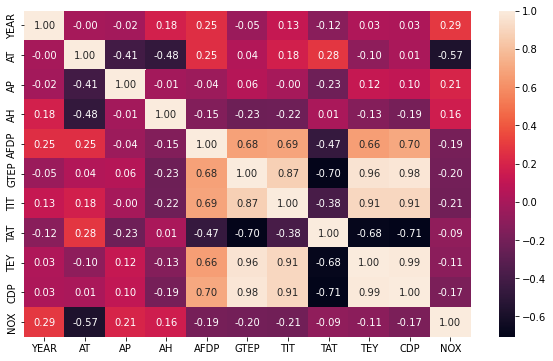

In [34]:
sns.heatmap(dev_df.iloc[:,:-1].corr(), annot = True, fmt = '.2f')

The features AFDP, GTEP, TIT, TAT, TEY and CDP seem to correlated one to another. 

In particular we have positive correlation between AFDP, GTEP, TIT, TEY, CDP, while TAT is characterized with a negative linear relationship.

Another significative correlation can be seen between the AT with the AP, AH as one can expects, but also with NOX column.

In [35]:
dev_df.corr()['CO']

YEAR   -0.177655
AT     -0.173731
AP      0.066065
AH      0.112168
AFDP   -0.445265
GTEP   -0.516484
TIT    -0.702058
TAT     0.056917
TEY    -0.565702
CDP    -0.547465
NOX     0.343427
CO      1.000000
Name: CO, dtype: float64

In [37]:
dev_df.corr()['CO'].loc[abs(dev_df.corr()['CO']) > 0.5].sort_values()

TIT    -0.702058
TEY    -0.565702
CDP    -0.547465
GTEP   -0.516484
CO      1.000000
Name: CO, dtype: float64

The cell above allows to individuate the features with the highest correlation, negative in that case, with the CO emission value. We may start from these 5 features.

## Evaluation Dataset

In [41]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12245 entries, 24488 to 36732
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    12245 non-null  int64  
 1   LOC     12245 non-null  object 
 2   SN      12245 non-null  object 
 3   AT      12245 non-null  float64
 4   AP      12245 non-null  float64
 5   AH      12245 non-null  float64
 6   AFDP    12245 non-null  float64
 7   GTEP    12245 non-null  float64
 8   TIT     12245 non-null  float64
 9   TAT     12245 non-null  float64
 10  TEY     12245 non-null  float64
 11  CDP     12245 non-null  float64
 12  NOX     6182 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 1.3+ MB


In [42]:
eval_df.describe()

,YEAR,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
count,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,6182.000000
mean,2019.999673,17.673560,1013.129993,77.897892,3.924462,25.597299,1081.497705,546.113843,133.629260,12.069541,65.261535
std,1.421931,7.396537,6.445599,14.326681,0.771641,4.209848,17.587331,6.868486,15.642752,1.091776,11.800257
min,2018.000000,-5.895600,985.850000,27.504000,2.144100,17.719000,1000.800000,512.450000,100.030000,9.851800,27.765000
25%,2019.000000,11.843000,1008.900000,68.300000,3.358500,23.214000,1072.000000,544.570000,124.930000,11.463000,57.193250
50%,2020.000000,17.743000,1012.700000,80.422000,3.938400,25.119000,1085.900000,549.870000,133.740000,11.968000,63.697500
75%,2021.000000,23.584000,1017.100000,89.355000,4.374700,29.256000,1097.800000,550.040000,144.550000,12.918000,71.508500
max,2022.000000,35.822000,1036.600000,100.200000,7.610600,38.362000,1100.800000,550.570000,177.880000,15.083000,119.910000


In [43]:
countries_turbine = eval_df['LOC'].value_counts()

In [44]:
round((countries_turbine / len(eval_df)).mean(), 3)

0.037

In [45]:
len(set(eval_df['LOC']) | set(eval_df['LOC']))

27

All the countries in the development df are also in the validation one.

# Feature Analysis

Riportare le considerazioni sulle distribuzioni e sulla correlazione delle features.

# Pre-processing

This section contains all the transformations required to prepare the data

Since we have to apply the same transformantion on both **dev_df** and **eval_df**, we concatenate them.The dev_df has index that goes from 1 up to 24487, while eval_df index starts from 24488 and ends with 36732.

In [5]:
dev_eval_df = pd.concat((dev_df, eval_df),axis = 0)
dev_eval_df

,YEAR,LOC,SN,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX,CO
ID,,,,,,,,,,,,,,
0,2022,Austria,0903XTR,24.9180,1006.8,55.697,3.3648,22.322,1071.5,550.03,119.83,11.171,NaN,1.07640
1,2022,Romania,0903XTR,14.3320,1024.1,81.857,3.2767,20.049,1037.3,533.70,110.05,10.692,102.010,10.19600
2,2022,Sweden,0903XTR,11.5480,1009.1,78.389,4.9142,28.616,1093.9,539.43,147.19,12.979,NaN,0.78407
3,2022,Finland,0903XTR,25.5970,1003.0,77.744,3.2325,20.749,1062.1,549.95,112.79,10.624,52.225,1.61530
4,2022,Estonia,0903XTR,13.4840,1011.1,96.477,4.1968,24.230,1086.1,550.08,133.71,11.921,71.915,1.40710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36728,2019,Germany,0903XTR,13.0950,1019.7,83.641,2.7132,23.150,1068.0,550.05,124.78,11.295,NaN,NaN
36729,2019,Slovenia,0903XTR,7.0438,1002.1,67.981,3.7544,32.331,1100.1,532.65,163.17,14.029,60.576,NaN
36730,2018,France,0903XTR,14.4540,1014.7,77.738,2.7177,18.748,1045.8,549.75,107.85,10.208,NaN,NaN


In [40]:
nat_pred = {'AT':'°C', 'AP':'mbar', 'AH':'%'}
proc_pred = {'AFDP':'mbar', 'GTEP':'mbar', 'TIT':'°C', 'TAT':'°C', 'TEY':'MW/h', 'CDP':'mbar'}
target = {'CO':'mg/m^3'}

### SN

Since SN column has the same value, 0903XTR, for all the entries, we remove it.

In [6]:
dev_eval_df = dev_eval_df.drop(columns = 'SN')
dev_eval_df.head()

,YEAR,LOC,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX,CO
ID,,,,,,,,,,,,,
0,2022,Austria,24.918,1006.8,55.697,3.3648,22.322,1071.5,550.03,119.83,11.171,NaN,1.07640
1,2022,Romania,14.332,1024.1,81.857,3.2767,20.049,1037.3,533.70,110.05,10.692,102.010,10.19600
2,2022,Sweden,11.548,1009.1,78.389,4.9142,28.616,1093.9,539.43,147.19,12.979,NaN,0.78407
3,2022,Finland,25.597,1003.0,77.744,3.2325,20.749,1062.1,549.95,112.79,10.624,52.225,1.61530
4,2022,Estonia,13.484,1011.1,96.477,4.1968,24.230,1086.1,550.08,133.71,11.921,71.915,1.40710


### LOC

In the 'Feature Analysis' section, it was noted that location does not appear to be discriminative in the calculation of CO. However, to confirm this intuition, models will be developed in subsequent sections by including the LOC column. For this reason, 1-hot encoding is appplicated below.

In [7]:
LOC_onehot = pd.get_dummies(dev_eval_df['LOC'])

In [8]:
onehot_df = pd.concat((dev_eval_df,LOC_onehot), axis = 1).drop(columns = 'LOC')
onehot_df

,YEAR,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,...,Malta,Netherlands,Poland,Portugal,Republic of Cyprus,Romania,Slovakia,Slovenia,Spain,Sweden
ID,,,,,,,,,,,,,,,,,,,,,
0,2022,24.9180,1006.8,55.697,3.3648,22.322,1071.5,550.03,119.83,11.171,...,0,0,0,0,0,0,0,0,0,0
1,2022,14.3320,1024.1,81.857,3.2767,20.049,1037.3,533.70,110.05,10.692,...,0,0,0,0,0,1,0,0,0,0
2,2022,11.5480,1009.1,78.389,4.9142,28.616,1093.9,539.43,147.19,12.979,...,0,0,0,0,0,0,0,0,0,1
3,2022,25.5970,1003.0,77.744,3.2325,20.749,1062.1,549.95,112.79,10.624,...,0,0,0,0,0,0,0,0,0,0
4,2022,13.4840,1011.1,96.477,4.1968,24.230,1086.1,550.08,133.71,11.921,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36728,2019,13.0950,1019.7,83.641,2.7132,23.150,1068.0,550.05,124.78,11.295,...,0,0,0,0,0,0,0,0,0,0
36729,2019,7.0438,1002.1,67.981,3.7544,32.331,1100.1,532.65,163.17,14.029,...,0,0,0,0,0,0,0,1,0,0
36730,2018,14.4540,1014.7,77.738,2.7177,18.748,1045.8,549.75,107.85,10.208,...,0,0,0,0,0,0,0,0,0,0


The new dataset has 14 (starting columns) + 27 (#countries) - 2 (LOC, SN) = 39 columns

<AxesSubplot:>

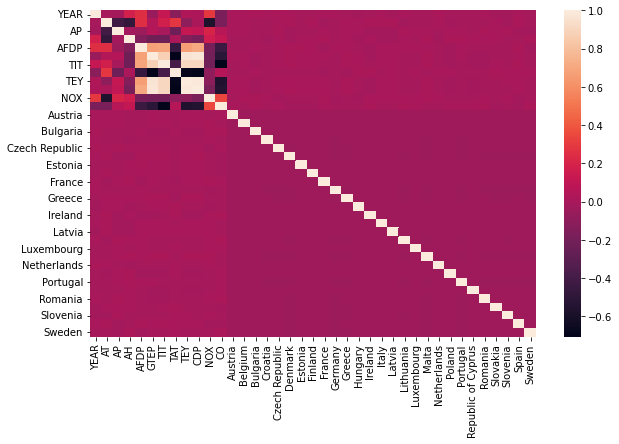

In [9]:
sns.heatmap(onehot_df[:24487].corr())

In [10]:
countries = dev_df['LOC'].values
onehot_df.corr().loc[onehot_df.corr().columns.isin(countries), 'CO']

Austria               0.001449
Belgium              -0.004485
Bulgaria              0.009470
Croatia              -0.002190
Czech Republic        0.000213
Denmark              -0.008786
Estonia              -0.007870
Finland              -0.007518
France                0.004244
Germany              -0.002247
Greece               -0.005863
Hungary              -0.000276
Ireland               0.008361
Italy                -0.004061
Latvia               -0.006075
Lithuania             0.015745
Luxembourg            0.001278
Malta                -0.005520
Netherlands          -0.000790
Poland                0.005286
Portugal              0.002035
Republic of Cyprus    0.004223
Romania               0.011280
Slovakia             -0.008623
Slovenia             -0.002945
Spain                -0.007469
Sweden                0.011501
Name: CO, dtype: float64

As was expected there is no correlation between LOC and CO emission. We can probably discard the LOC column.

### NOX

Reading previous work done on that dataset and based on the correlation matrix reported above, NOX does not seem to have a great importance for the CO prediction since it is anohter emission gas produced by the turbine.

However, as mentioned for LOC, we decided to implement models that also include the NOX column among the predictors to confirm our idea. Therefore, it is necessary to fill in the missing values. The strategy we decided to adopt is to use a KNN algorithm by exploiting the environmental predictors and turbine predictors. In this way, each record will be assigned an emission value similar to records with the same values on the other columns.

In [11]:
l_nat_pred = list(nat_pred.keys())
l_proc_pred = list(proc_pred.keys())

In [12]:
dev_eval_df_for_knnImputer = dev_eval_df[['YEAR']+l_nat_pred+l_proc_pred+['NOX']]

imputer = KNNImputer(n_neighbors=5)
filled_vales = imputer.fit_transform(dev_eval_df_for_knnImputer.values)

In [13]:
dev_eval_df_for_knnImputer.loc[:,['YEAR']+l_nat_pred+l_proc_pred+['NOX']] = filled_vales
dev_eval_df_for_knnImputer.shape

c:\Users\sebas\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


(36733, 11)

In [14]:
onehot_df.loc[:, 'NOX'] = dev_eval_df_for_knnImputer['NOX']

In [15]:
onehot_df.head()

,YEAR,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,...,Malta,Netherlands,Poland,Portugal,Republic of Cyprus,Romania,Slovakia,Slovenia,Spain,Sweden
ID,,,,,,,,,,,,,,,,,,,,,
0,2022,24.918,1006.8,55.697,3.3648,22.322,1071.5,550.03,119.83,11.171,...,0,0,0,0,0,0,0,0,0,0
1,2022,14.332,1024.1,81.857,3.2767,20.049,1037.3,533.70,110.05,10.692,...,0,0,0,0,0,1,0,0,0,0
2,2022,11.548,1009.1,78.389,4.9142,28.616,1093.9,539.43,147.19,12.979,...,0,0,0,0,0,0,0,0,0,1
3,2022,25.597,1003.0,77.744,3.2325,20.749,1062.1,549.95,112.79,10.624,...,0,0,0,0,0,0,0,0,0,0
4,2022,13.484,1011.1,96.477,4.1968,24.230,1086.1,550.08,133.71,11.921,...,0,0,0,0,0,0,0,0,0,0


In [24]:
onehot_df['NOX'].count()

36733

Now all columns does not have missing values.

In [19]:
onehot_df[['NOX','CO']].corr()

,NOX,CO
NOX,1.000000,0.342271
CO,0.342271,1.000000


As we expected the correlation between NOX and CO is still the same. We can assume that the imputer worked well, it is not necessary a deeper tuning of it.

### Dataset standardization

In [50]:
scaler = StandardScaler()
scaler.fit(onehot_df.loc[:24487,'AT':'NOX'])
std_df = onehot_df.copy()
std_df.loc[:,'AT':'NOX'] = scaler.transform(onehot_df.loc[:,'AT':'NOX'])

In [51]:
onehot_df.loc[:24487,'AT':'NOX']

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
ID,,,,,,,,,,
0,24.9180,1006.8,55.697,3.3648,22.322,1071.5,550.03,119.83,11.171,56.8328
1,14.3320,1024.1,81.857,3.2767,20.049,1037.3,533.70,110.05,10.692,102.0100
2,11.5480,1009.1,78.389,4.9142,28.616,1093.9,539.43,147.19,12.979,74.2636
3,25.5970,1003.0,77.744,3.2325,20.749,1062.1,549.95,112.79,10.624,52.2250
4,13.4840,1011.1,96.477,4.1968,24.230,1086.1,550.08,133.71,11.921,71.9150
...,...,...,...,...,...,...,...,...,...,...
24483,10.0100,1012.7,86.073,2.9555,24.000,1084.0,549.94,133.32,11.849,75.9360
24484,2.4820,1029.7,87.328,4.7165,33.295,1100.0,529.85,166.64,14.197,49.7850
24485,27.4130,1012.4,59.496,3.1360,20.205,1059.6,549.85,110.77,10.635,54.4470


In [52]:
std_df

,YEAR,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,...,Malta,Netherlands,Poland,Portugal,Republic of Cyprus,Romania,Slovakia,Slovenia,Spain,Sweden
ID,,,,,,,,,,,,,,,,,,,,,
0,2022,0.961592,-0.964193,-1.524936,-0.724114,-0.769905,-0.564983,0.563634,-0.872408,-0.813978,...,0,0,0,0,0,0,0,0,0,0
1,2022,-0.455031,1.708863,0.275700,-0.837779,-1.312530,-2.518071,-1.827585,-1.499082,-1.254529,...,0,0,0,0,0,1,0,0,0,0
2,2022,-0.827587,-0.608815,0.036992,1.274906,0.732639,0.714232,-0.988535,0.880742,0.848897,...,0,0,0,0,0,0,0,0,0,1
3,2022,1.052456,-1.551338,-0.007405,-0.894806,-1.145422,-1.101797,0.551920,-1.323511,-1.317071,...,0,0,0,0,0,0,0,0,0,0
4,2022,-0.568511,-0.299791,1.282019,0.349324,-0.314415,0.268791,0.570956,0.016982,-0.124179,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36728,2019,-0.620567,1.029011,0.398496,-1.564801,-0.572240,-0.764861,0.566563,-0.555226,-0.699931,...,0,0,0,0,0,0,0,0,0,0
36729,2019,-1.430341,-1.690398,-0.679408,-0.221456,1.619508,1.068301,-1.981338,1.904694,1.814615,...,0,0,0,0,0,0,0,1,0,0
36730,2018,-0.438705,0.256451,-0.007818,-1.558995,-1.623114,-2.032654,0.522634,-1.640052,-1.699679,...,0,0,0,0,0,0,0,0,0,0


In [61]:
std_df['YEAR'] = std_df.loc[:,'YEAR'].apply(lambda x: x-2022+5)


In [62]:
std_df

,YEAR,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,...,Malta,Netherlands,Poland,Portugal,Republic of Cyprus,Romania,Slovakia,Slovenia,Spain,Sweden
ID,,,,,,,,,,,,,,,,,,,,,
0,5,0.961592,-0.964193,-1.524936,-0.724114,-0.769905,-0.564983,0.563634,-0.872408,-0.813978,...,0,0,0,0,0,0,0,0,0,0
1,5,-0.455031,1.708863,0.275700,-0.837779,-1.312530,-2.518071,-1.827585,-1.499082,-1.254529,...,0,0,0,0,0,1,0,0,0,0
2,5,-0.827587,-0.608815,0.036992,1.274906,0.732639,0.714232,-0.988535,0.880742,0.848897,...,0,0,0,0,0,0,0,0,0,1
3,5,1.052456,-1.551338,-0.007405,-0.894806,-1.145422,-1.101797,0.551920,-1.323511,-1.317071,...,0,0,0,0,0,0,0,0,0,0
4,5,-0.568511,-0.299791,1.282019,0.349324,-0.314415,0.268791,0.570956,0.016982,-0.124179,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36728,2,-0.620567,1.029011,0.398496,-1.564801,-0.572240,-0.764861,0.566563,-0.555226,-0.699931,...,0,0,0,0,0,0,0,0,0,0
36729,2,-1.430341,-1.690398,-0.679408,-0.221456,1.619508,1.068301,-1.981338,1.904694,1.814615,...,0,0,0,0,0,0,0,1,0,0
36730,1,-0.438705,0.256451,-0.007818,-1.558995,-1.623114,-2.032654,0.522634,-1.640052,-1.699679,...,0,0,0,0,0,0,0,0,0,0


In [63]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36733 entries, 0 to 36732
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                36733 non-null  int64  
 1   AT                  36733 non-null  float64
 2   AP                  36733 non-null  float64
 3   AH                  36733 non-null  float64
 4   AFDP                36733 non-null  float64
 5   GTEP                36733 non-null  float64
 6   TIT                 36733 non-null  float64
 7   TAT                 36733 non-null  float64
 8   TEY                 36733 non-null  float64
 9   CDP                 36733 non-null  float64
 10  NOX                 36733 non-null  float64
 11  CO                  24488 non-null  float64
 12  Austria             36733 non-null  uint8  
 13  Belgium             36733 non-null  uint8  
 14  Bulgaria            36733 non-null  uint8  
 15  Croatia             36733 non-null  uint8  
 16  Czec

In [65]:
std_df.to_csv('processed_dataset/std_dataset')